In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-price-usd/main.csv


In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=293152 sha256=0f6ea5f5d442c2ff1f65d656715f3b2ff109223afd0a0f3ceb009d6b24299026
  Stored in directory: /root/.cache/pip/wheels/0d/32/b7/cad9f818b37cf97df4c87a8308da86a433af81651d98f8d8aa
Successfully built peewee


In [3]:
import yfinance as yf

In [83]:
#See the yahoo finance ticker for your stock symbol
stock_symbol = 'AMZN'

In [84]:
data = yf.download(tickers=stock_symbol,period= '3y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-23,132.160004,135.119995,132.160004,134.320007,132.017731,78657500
2021-04-26,134.830002,135.059998,133.559998,134.720001,132.410873,66905100
2021-04-27,135.009995,135.410004,134.110001,134.389999,132.086502,66015800
2021-04-28,134.309998,135.020004,133.080002,133.580002,131.290405,107760100
2021-04-29,136.470001,137.070007,132.449997,133.479996,131.192093,151101000
...,...,...,...,...,...,...
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900


In [10]:
# data = yf.download(tickers=stock_symbol,period= '7d',interval='1m')

In [57]:
# import yfinance as yf

# aapl= yf.Ticker("aapl")
# aapl

yfinance.Ticker object <AAPL>

In [148]:
data1 = yf.download(tickers="PFE",period= '3y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [149]:
x_test = []
y_test = []

In [150]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Handle NaN values (if any)
data1.dropna(inplace=True)  # Drop rows with NaN values

# Create a MinMaxScaler object
# scaler = MinMaxScaler(feature_range = (0,10))

# Normalize the entire 'Open' column
# data1['Open_scaled'] = scaler.fit_transform(data1[['Open']])

# Create NumPy arrays for X (past 15 days) and Y (next day's price)
window_size = 25

for i in range(window_size, len(data1)):
    past_prices = data1['Open'].iloc[i-window_size:i]  # Past 15 days' normalized prices
    x_test.append(past_prices.tolist())
    y_test.append(data1['Open'].iloc[i])  # Next day's normalized price

# Xx = np.array(Xx)
# Yy = np.array(Yy)

# print("Shape of X:", len(X))
# print("Shape of Y:", len(Y))
# print("Example from X:", X[0])  # Print the first sample of past 15 days' data
# print("Example from Y:", Y[0])  # Print the corresponding normalized next day's price


In [152]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [132]:
# data1 = aapl.history(start="2024-04-14", end="2024-04-20", interval="1m")
# data1
# aapl, googl, nvda, nio, riot, tsla, F, mara, T, amd, bac, rivn, vale, intc, uber
stock_symbol = 'UBER'
data = yf.download(tickers=stock_symbol,period= '3y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [133]:
# X, Y = [], []

In [134]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Handle NaN values (if any)
data.dropna(inplace=True)  # Drop rows with NaN values

# Create a MinMaxScaler object
# scaler = MinMaxScaler(feature_range = (0,10))

# Normalize the entire 'Open' column
# data1['Open_scaled'] = scaler.fit_transform(data1[['Open']])

# Create NumPy arrays for X (past 15 days) and Y (next day's price)
window_size = 25

for i in range(window_size, len(data)):
    past_prices = data['Open'].iloc[i-window_size:i]  # Past 15 days' normalized prices
    X.append(past_prices.tolist())
    Y.append(data['Open'].iloc[i])  # Next day's normalized price

# Xx = np.array(Xx)
# Yy = np.array(Yy)

print("Shape of X:", len(X))
print("Shape of Y:", len(Y))
print("Example from X:", X[0])  # Print the first sample of past 15 days' data
print("Example from Y:", Y[0])  # Print the corresponding normalized next day's price


Shape of X: 10795
Shape of Y: 10795
Example from X: [132.16000366210938, 134.8300018310547, 135.00999450683594, 134.30999755859375, 136.47000122070312, 131.77999877929688, 132.0399932861328, 131.19000244140625, 129.1999969482422, 127.88999938964844, 130.85000610351562, 129.41000366210938, 123.5, 123.4000015258789, 124.58000183105469, 126.25, 126.81999969482422, 126.55999755859375, 123.16000366210938, 125.2300033569336, 127.81999969482422, 126.01000213623047, 127.81999969482422, 126.95999908447266, 126.44000244140625]
Example from Y: 125.56999969482422


In [135]:
Xx = np.array(X)
Yy = np.array(Y)

In [136]:
Xt = Xx[:10000]
Yt = Yy[:10000]
Xv = Xx[10000:]
Yv = Yy[10000:]

In [153]:
X_test = np.reshape(x_test, (x_test.shape[0], 25, 1))

In [137]:
# Reshape input data to be 3D [samples, timesteps, features]
X_train = np.reshape(Xt, (Xt.shape[0], 25, 1))
X_val = np.reshape(Xv, (Xv.shape[0], 25, 1))

In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Lambda
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define L2 regularization weight (adjust as needed)
l2_reg = 0.001

# Define the model
# Define the model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(25, 1), kernel_regularizer=l2(l2_reg)))  # Add L2 to LSTM kernel
model.add(LSTM(units=128,return_sequences=True))  # Add L2 to LSTM kernel
model.add(LSTM(units=128))
model.add(Dense(units=128)) # Add ReLU to existing Dense layer
model.add(Dense(units=128))  # New Dense layer with ReLU activation
model.add(Dense(units=1)) # Output layer

# Compile model with optimizer, loss function, and metrics (optional)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Add mean absolute error (MAE) metric

# ... rest of your code (training, prediction)


# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit model with validation data and Early Stopping callback
model.fit(X_train, Yt, epochs=100, batch_size=32, validation_data=(X_val, Yv))

# # Make predictions on future data (future_data)
# future_data_scaled = scaler.transform(future_data)  # Apply scaling to future data
# predicted_prices = model.predict(future_data_scaled)

# No need for inverse transform with StandardScaler
# Predicted prices are already on the original scale


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 7448.0884 - mae: 40.3002 - val_loss: 30.8416 - val_mae: 4.3581
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 191.4504 - mae: 6.4462 - val_loss: 6.0379 - val_mae: 2.0719
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 74.5960 - mae: 3.9436 - val_loss: 58.2412 - val_mae: 4.2284
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 206.4510 - mae: 7.6955 - val_loss: 3.8718 - val_mae: 1.6118
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 137.0865 - mae: 5.1027 - val_loss: 3.6784 - val_mae: 1.5572
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 65.1977 - mae: 3.5863 - val_loss: 20.2876 - val_mae: 4.0989
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 258.1977 - mae: 6.3218 - val_loss: 1.7289 - val_mae: 0.9793
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 98.8885 - mae: 4.3973 - val_loss: 5.5106 - val_mae: 1.9248
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2

In [139]:
from keras.models import load_model

# Assuming you have already trained and compiled your Keras model, named 'model'

# Save the model to a file
model.save('my_model.h5')

In [140]:
predictions = model.predict(Xv)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [155]:
predictions = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [142]:
# Xx = np.reshape(Xx, (Xx.shape[0], 15, 1))
# # X_val = np.reshape(X_vad, (X_vad.shape[0], 15, 1))

In [143]:
prediction2 = model.predict(Xt)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [144]:
predictions.shape

(795, 1)

In [145]:
predictions[0]

array([46.26038], dtype=float32)

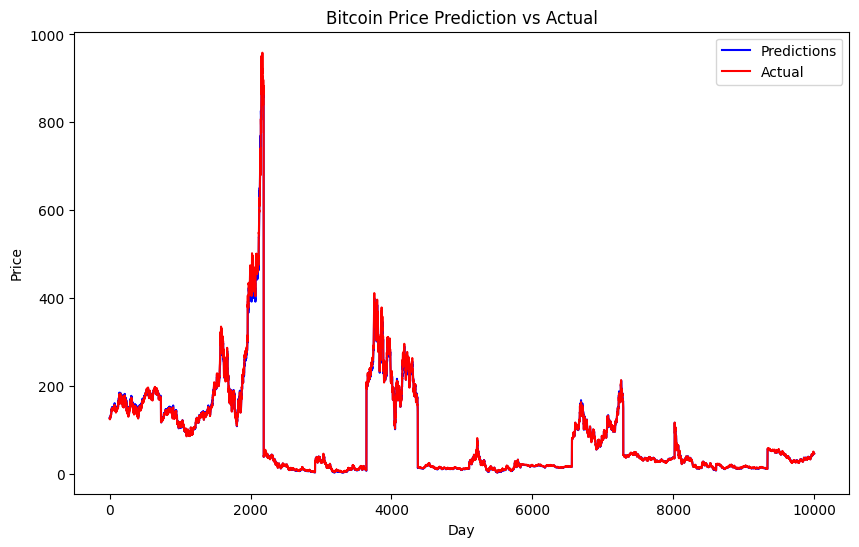

In [182]:
import matplotlib.pyplot as plt

# Assuming predictions and y_test are numpy arrays

# Create an array of day indices for plotting
days = np.arange(len(prediction2))

# Plot the predicted prices and actual prices
plt.figure(figsize=(10, 6))
plt.plot(days, prediction2, label='Predictions', color='blue')
plt.plot(days, Yt, label='Actual', color='red')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction vs Actual')
plt.legend()
plt.show()


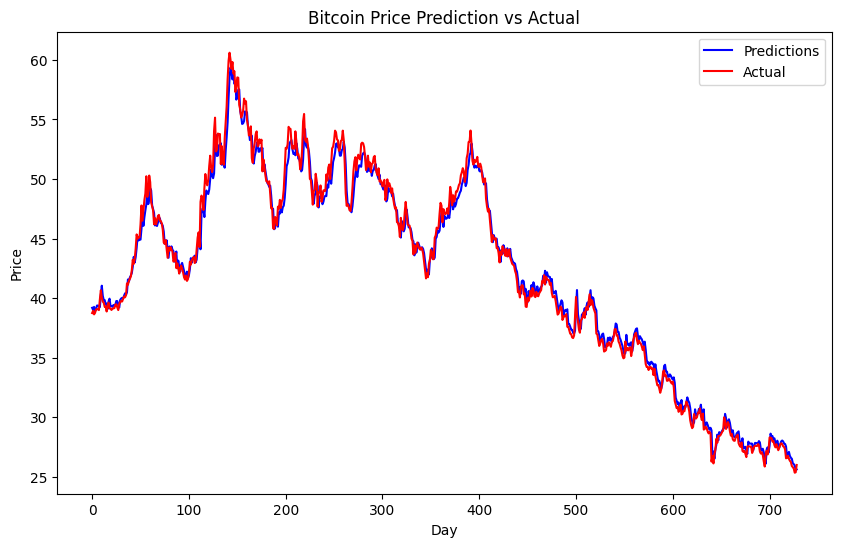

In [156]:
import matplotlib.pyplot as plt

# Assuming predictions and y_test are numpy arrays

# Create an array of day indices for plotting
days = np.arange(len(predictions))

# Plot the predicted prices and actual prices
plt.figure(figsize=(10, 6))
plt.plot(days, predictions, label='Predictions', color='blue')
plt.plot(days, y_test, label='Actual', color='red')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction vs Actual')
plt.legend()
plt.show()


In [169]:
data = yf.download(tickers=stock_symbol,period= '30m',interval='1m')

[*********************100%%**********************]  1 of 1 completed


In [163]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-19 15:30:00-04:00,165.160004,165.190002,165.100006,165.126999,165.126999,0
2024-04-19 15:31:00-04:00,165.130005,165.199997,165.089996,165.110001,165.110001,110170
2024-04-19 15:32:00-04:00,165.104996,165.134995,165.020004,165.100006,165.100006,95783
2024-04-19 15:33:00-04:00,165.100006,165.130005,165.029999,165.119995,165.119995,146268
2024-04-19 15:34:00-04:00,165.130005,165.169998,165.080002,165.080002,165.080002,106334
2024-04-19 15:35:00-04:00,165.100006,165.130005,165.029999,165.029999,165.029999,658915
2024-04-19 15:36:00-04:00,165.029999,165.054993,164.809998,164.975006,164.975006,182516
2024-04-19 15:37:00-04:00,164.979996,165.189896,164.979996,165.160004,165.160004,154625
2024-04-19 15:38:00-04:00,165.160004,165.199997,165.050003,165.100006,165.100006,152433


In [170]:
data = data['Open']
data = data[5:30]

In [165]:
len(data)

25

In [184]:
def pred(x):
    x = [value / 100 for value in x]
#     print(x)
    x = np.array(x)
#     print(x.shape[0])
    x = np.reshape(x, (1,x.shape[0]))
    predictions = model.predict(x)
    return predictions[0][0]

In [212]:
from threading import Timer
import matplotlib.pyplot as plt

In [213]:
running = True

In [214]:
def stop_loop(signo, frame):
    global running
    running = False
    print("Stopping prediction loop...")
import signal
signal.signal(signal.SIGINT, stop_loop)

<function _signal.default_int_handler(signalnum, frame, /)>

In [215]:
def pred(x):
    x = [value / 100 for value in x]
#     print(x)
    x = np.array(x)
#     print(x.shape[0])
    x = np.reshape(x, (1,x.shape[0]))
    predictions = model.predict(x)
    return predictions[0][0]

In [216]:
def predict():
    global running
    data = yf.download(tickers=stock_symbol,period= '30m',interval='1m')
    data = data['Open']
    data = data.tolist()
    for i in range(0,15):
        x = len(data)
        d1 = data[x-25:x]
        p = pred(d1)
        p = p*100
        print(p)
        data.append(p)
    plott(data)
    if running:
        t = Timer(60, predict)  # Adjust timer interval as needed
        t.start()

In [217]:
def plott(data):
    data = data[20:]
    # Create an array of day indices for plotting
    days = np.arange(len(data))

    # Separate first 30 and remaining points
    first_30_days = days[:10]
    remaining_days = days[10:]

    first_30_data = data[:10]
    remaining_data = data[10:]

    # Plot the data with different colors
    plt.figure(figsize=(10, 6))
    plt.plot(first_30_days, first_30_data, label='Predictions (First 30)', color='blue')
    plt.plot(remaining_days, remaining_data, label='Predictions (Rest)', color='red')

    # Create connecting line segment (assuming first_30_data[-1] and remaining_data[0] are valid)
    connecting_line_x = [first_30_days[-1], remaining_days[0]]
    connecting_line_y = [first_30_data[-1], remaining_data[0]]
    plt.plot(connecting_line_x, connecting_line_y, color='red', linestyle='--')  # Dashed line for distinction

    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title('Apple Price Prediction')
    plt.legend()
    plt.show()

In [167]:
!pip install tweepy
import tweepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 987.6 kB/s eta 0:00:000:00:010m


In [176]:
consumer_key = "7kcdoAr9LpgrBSHROfGRzFEAw"
consumer_secret = "pw9MolIiwu2wiweyOEQCsNt3KMxrRnbBVYpjq4DgH263qCqUcL"
access_token = "1775874291474550784-uqJNiqvTuwB4UYHbZgK0ojY8DTeBfN"
access_token_secret = "UnN9d81c37LNSLa3qKmL6YPPPlFtohPK79NeCBLSl0wqy"
num_of_tweets = int(300)

In [175]:
    
#         stock_ticker_map = pd.read_csv('Yahoo-Finance-Ticker-Symbols.csv')
#         stock_full_form = stock_ticker_map[stock_ticker_map['Ticker']==symbol]
# symbol = stock_full_form['AAPL'].to_list()[0][0:12]
symbol = "Apple Inc."

#     auth = tweepy.OAuthHandler(ct.consumer_key, ct.consumer_secret)
#     auth.set_access_token(ct.access_token, ct.access_token_secret)
#     user = tweepy.API(auth)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
user = tweepy.API(auth)

tweets = tweepy.Cursor(user.search_tweets, q=symbol, tweet_mode='extended', lang='en',exclude_replies=True).items(num_of_tweets)
print(tweets)
tweet_list = [] #List of tweets alongside polarity
global_polarity = 0 #Polarity of all tweets === Sum of polarities of individual tweets
tw_list=[] #List of tweets only => to be displayed on web page
#Count Positive, Negative to plot pie chart
pos=0 #Num of pos tweets
neg=1 #Num of negative tweets
for tweet in tweets:
    count=20 #Num of tweets to be displayed on web page
    #Convert to Textblob format for assigning polarity
    tw2 = tweet.full_text
    tw = tweet.full_text
    #Clean
    tw=p.clean(tw)
    #print("-------------------------------CLEANED TWEET-----------------------------")
    #print(tw)
    #Replace &amp; by &
    tw=re.sub('&amp;','&',tw)
    #Remove :
    tw=re.sub(':','',tw)
    #print("-------------------------------TWEET AFTER REGEX MATCHING-----------------------------")
    #print(tw)
    #Remove Emojis and Hindi Characters
    tw=tw.encode('ascii', 'ignore').decode('ascii')

    #print("-------------------------------TWEET AFTER REMOVING NON ASCII CHARS-----------------------------")
    #print(tw)
    blob = TextBlob(tw)
    polarity = 0 #Polarity of single individual tweet
    for sentence in blob.sentences:

        polarity += sentence.sentiment.polarity
        if polarity>0:
            pos=pos+1
        if polarity<0:
            neg=neg+1

        global_polarity += sentence.sentiment.polarity
    if count > 0:
        tw_list.append(tw2)

    tweet_list.append(Tweet(tw, polarity))
    count=count-1
if len(tweet_list) != 0:
    global_polarity = global_polarity / len(tweet_list)
else:
    global_polarity = global_polarity
neutral=num_of_tweets-pos-neg
if neutral<0:
    neg=neg+neutral
    neutral=20
print()
print("##############################################################################")
print("Positive Tweets :",pos,"Negative Tweets :",neg,"Neutral Tweets :",neutral)
print("##############################################################################")
labels=['Positive','Negative','Neutral']
sizes = [pos,neg,neutral]
explode = (0, 0, 0)
fig = plt.figure(figsize=(7.2,4.8),dpi=65)
fig1, ax1 = plt.subplots(figsize=(7.2,4.8),dpi=65)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('static/SA.png')
plt.close(fig)
#plt.show()
if global_polarity>0:
    print()
    print("##############################################################################")
    print("Tweets Polarity: Overall Positive")
    print("##############################################################################")
    tw_pol="Overall Positive"
else:
    print()
    print("##############################################################################")
    print("Tweets Polarity: Overall Negative")
    print("##############################################################################")
    tw_pol="Overall Negative"
print(global_polarity,tw_list,tw_pol,pos,neg,neutral)


Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

In [180]:
import tweepy

# Authenticate with Twitter API
consumer_key = "7kcdoAr9LpgrBSHROfGRzFEAw"
consumer_secret = "pw9MolIiwu2wiweyOEQCsNt3KMxrRnbBVYpjq4DgH263qCqUcL"
access_token = "1775874291474550784-uqJNiqvTuwB4UYHbZgK0ojY8DTeBfN"
access_token_secret = "UnN9d81c37LNSLa3qKmL6YPPPlFtohPK79NeCBLSl0wqy"

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Search for tweets related to Apple company
search_query = 'Apple'
num_tweets = 100  # Number of tweets to retrieve
tweets = tweepy.Cursor(api.search_tweets, q=search_query, tweet_mode='extended').items(num_tweets)

# Print retrieved tweets
for tweet in tweets:
    print(tweet.full_text)


Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

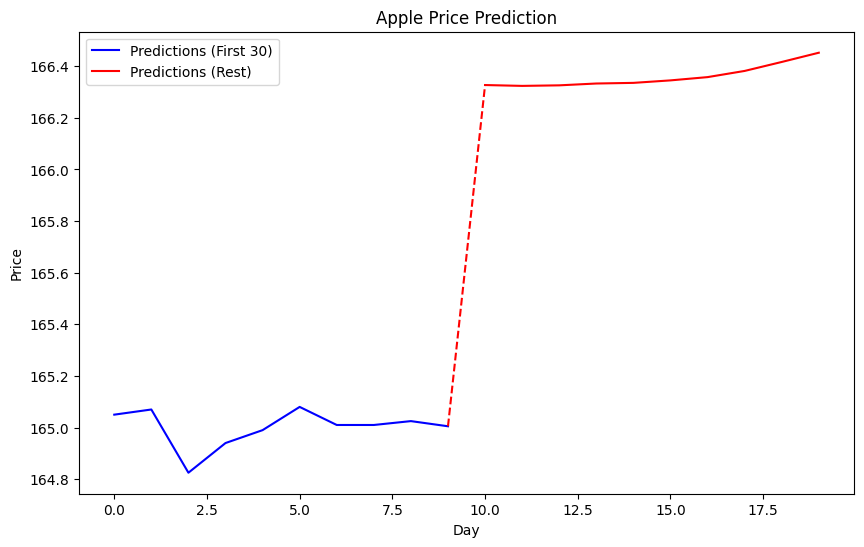